### Imports

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import datetime

### Nicole Covid Code

In [60]:
#reference file
file = "Resources/use_this_covid_data.csv"

In [61]:
#import data frame
covid_data = pd.read_csv(file)
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [62]:
#check all column names
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [74]:
covid_data.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [71]:
#groupby country, year, month, get last day of month
end_date = "2020-12-31"

covid_data_2020 = covid_data["date"] <= end_date
covid_data_2020

0         True
1         True
2         True
3         True
4         True
         ...  
84754    False
84755    False
84756    False
84757    False
84758    False
Name: date, Length: 84759, dtype: bool

In [76]:
#add 8 countries info to data frame
#US
#Canada
#China
#Brazil
#Germany
#India
#Japan
#Mexico

countries_data = covid_data.loc[(covid_data["location"] == "United States") |
                           (covid_data["location"] == "Canada") | 
                           (covid_data["location"] == "China") | 
                           (covid_data["location"] == "Brazil") | 
                           (covid_data["location"] == "Germany") | 
                           (covid_data["location"] == "India") | 
                           (covid_data["location"] == "Japan") | 
                           (covid_data["location"] == "Mexico")]

countries_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10872,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
10873,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
10874,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
10875,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
10876,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80811,USA,North America,United States,2021-04-24,32045113.0,53363.0,59585.714,571987.0,724.0,700.143,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
80812,USA,North America,United States,2021-04-25,32077178.0,32065.0,58163.857,572266.0,279.0,694.571,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
80813,USA,North America,United States,2021-04-26,32124869.0,47691.0,55272.143,572740.0,474.0,693.429,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
80814,USA,North America,United States,2021-04-27,32175725.0,50856.0,53784.000,573381.0,641.0,667.143,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


In [77]:
#find total deaths for each country
countries_deaths = countries_data.groupby(["location"])["total_deaths_per_million"].max()
countries_deaths

location
Brazil           1873.288
Canada            638.808
China               3.366
Germany           985.726
India             148.429
Japan              79.477
Mexico           1674.656
United States    1735.152
Name: total_deaths_per_million, dtype: float64

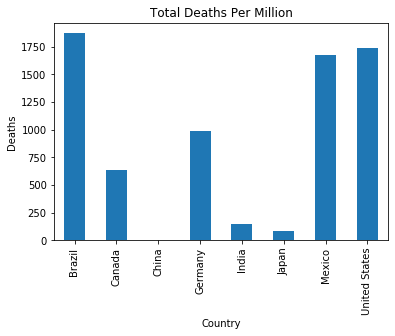

In [78]:
#bar chart of deaths for each country

bar_plot = countries_deaths.plot(kind = "bar")

#labels
plt.title("Total Deaths Per Million")
plt.xlabel("Country")
plt.ylabel("Deaths")

plt.show()

In [79]:
#reduce data down to country, date and total deaths
reduced_data = countries_data.loc[:, ["location", "date", "total_deaths"]]
reduced_data

,location,date,total_deaths
10872,Brazil,2020-02-26,NaN
10873,Brazil,2020-02-27,NaN
10874,Brazil,2020-02-28,NaN
10875,Brazil,2020-02-29,NaN
10876,Brazil,2020-03-01,NaN
...,...,...,...
80811,United States,2021-04-24,571987.0
80812,United States,2021-04-25,572266.0
80813,United States,2021-04-26,572740.0
80814,United States,2021-04-27,573381.0


In [81]:
#get rid of days that don't have deaths
reduced_data = reduced_data.dropna(how = "any")
reduced_data

,location,date,total_deaths
10892,Brazil,2020-03-17,1.0
10893,Brazil,2020-03-18,3.0
10894,Brazil,2020-03-19,6.0
10895,Brazil,2020-03-20,11.0
10896,Brazil,2020-03-21,15.0
...,...,...,...
80811,United States,2021-04-24,571987.0
80812,United States,2021-04-25,572266.0
80813,United States,2021-04-26,572740.0
80814,United States,2021-04-27,573381.0


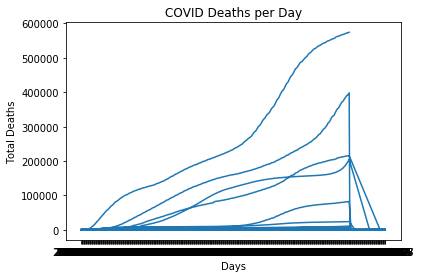

In [82]:
#line chart of deaths per days
x_axis = reduced_data["date"]
y_axis = reduced_data["total_deaths"]
plt.plot(x_axis, y_axis)

#labels
plt.title("COVID Deaths per Day")
plt.xlabel("Days")
plt.ylabel("Total Deaths")

plt.show()

In [83]:
US_data = reduced_data.loc[reduced_data["location"] == "United States", :]
US_data

,location,date,total_deaths
80391,United States,2020-02-29,1.0
80392,United States,2020-03-01,1.0
80393,United States,2020-03-02,6.0
80394,United States,2020-03-03,7.0
80395,United States,2020-03-04,11.0
...,...,...,...
80811,United States,2021-04-24,571987.0
80812,United States,2021-04-25,572266.0
80813,United States,2021-04-26,572740.0
80814,United States,2021-04-27,573381.0


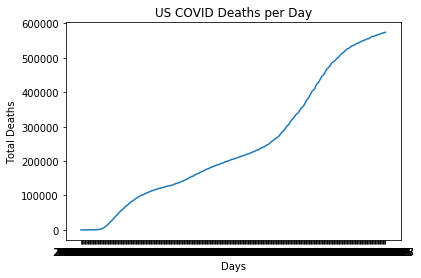

In [48]:
x_axis = US_data["date"]
y_axis = US_data["total_deaths"]
plt.plot(x_axis, y_axis)

#labels
plt.title("US COVID Deaths per Day")
plt.xlabel("Days")
plt.ylabel("Total Deaths")

plt.show()

### Enrique Covid Code

### Currency Code

### Stock Code

### Question 1: How do countries rate on per-capital covid deaths?

* Bar graph: per-capita deaths by country
    
* Line graph: per capita deaths over time

### Question 2: 

### Question 3:

### Analysis